### MatplotLib and Numpy Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
print('Numpy version', np.__version__)

Numpy version 1.18.1


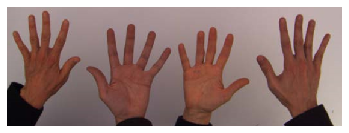

In [2]:
handsImg = plt.imread('../Images/Hands.png') #returns numpy array. RGBA
plt.imshow(handsImg[:,:,0:3])
plt.axis('off');

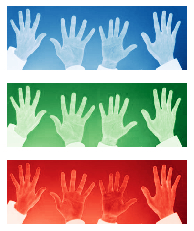

In [3]:
def getImageChannels(img:np.ndarray)->(np.ndarray,np.ndarray,np.ndarray):
    B = img[:,:,1] #Get Blue Channel
    G = img[:,:,2] #Get Green Channel
    R = img[:,:,0] #Get RED Channel
    return (R,G,B)

(R,G,B)=getImageChannels(handsImg)
fig = plt.figure(figsize=(100,4))
(ax1,ax2,ax3)= fig.subplots(3,1)
ax1.imshow(B,cmap='Blues')
ax1.axis('off')
ax2.imshow(G,cmap='Greens')
ax2.axis('off')
ax3.imshow(R,cmap='Reds')
ax3.axis('off');

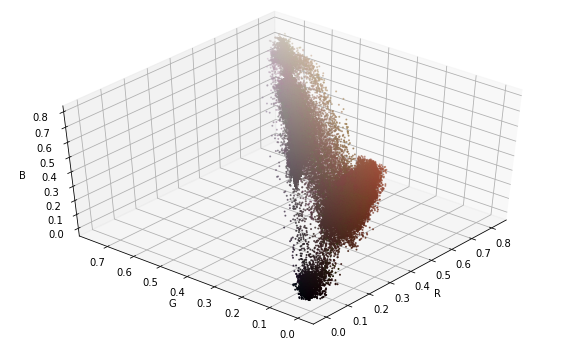

In [4]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
#Normal View
ax.scatter(R,G,B,s=1,zdir='z',c=handsImg[:,:,0:3].reshape(R.size,3));
ax.view_init(elev=45,azim=220)

### ANGLE VIEW TO SEE B CHANNEL AND R CHANNEL

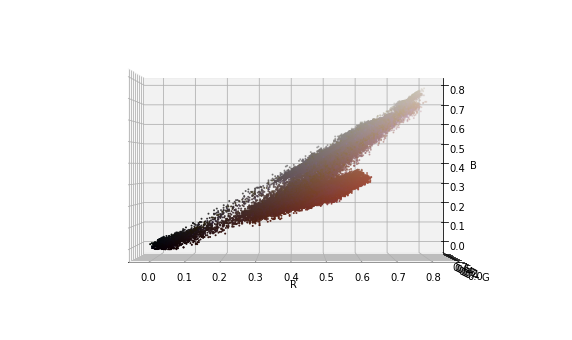

In [5]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
ax.scatter(R,G,B,s=1,zdir='z',c=handsImg[:,:,0:3].reshape(R.size,3));
ax.view_init(elev=0,azim=270)

### ANGLE VIEW TO SEE G CHANNEL AND R CHANNEL

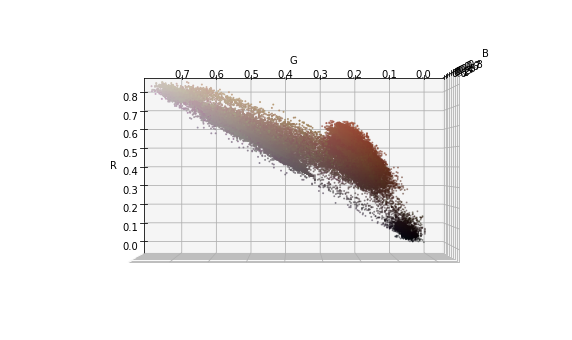

In [6]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
ax.scatter(R,G,B,s=1,zdir='z',c=handsImg[:,:,0:3].reshape(R.size,3));
ax.view_init(elev=90,azim=180)

### Pixel Classifier - Descriptor

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

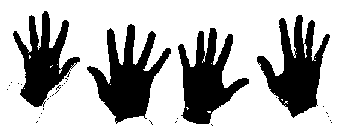

In [32]:
def getHands(R:np.ndarray, G:np.ndarray, B:np.ndarray):
    z = np.zeros(R.size).reshape(R.shape)
    o = np.ones(R.size).reshape(R.shape)
    newR = np.where(R>=0.25,R,z)
    newR = np.where(R<=0.65,R,z)

    newG = np.where(G>=0.4,G,z)
    newG = np.where(G<=0.3,G,z)

    newB = np.where(B>=0.1,B,z)
    newB = np.where(B<=0.3,B,z)

    sumIMG = (newR+newG+newB)
    newIMG = np.where(sumIMG>0.65,o,z)
    #newIMG = np.where(sumIMG>0.65,sumIMG,z)
    #plt.imshow(newR,cmap='binary')
    #plt.imshow(newG,cmap='binary')
    #plt.imshow(newB,cmap='binary')
    plt.axis('off')
    plt.imshow(newIMG,cmap='binary');
    return newIMG

getHands(R,G,B)

### OpenCV Implementation

OpenCV version 4.1.1


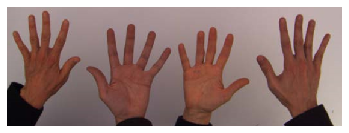

In [8]:
import cv2
import matplotlib.pyplot as plt
print('OpenCV version', cv2.__version__)
handsImg2 = cv2.imread('../Images/Hands.png') #returns numpy array. BGR
handsImg2_RGB = cv2.cvtColor(handsImg2,cv2.COLOR_BGR2RGB)
plt.imshow(handsImg2_RGB)
plt.axis('off');

### Color Cordinates Algorithm

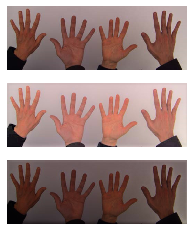

In [9]:
handsImg = plt.imread('../Images/Hands.png') #returns numpy array. RGBA
handsImg1 = plt.imread('../Images/Hands_1.png') #returns numpy array. RGBA
handsImg2 = plt.imread('../Images/Hands_2.png') #returns numpy array. RGBA

fig, (ax1,ax2,ax3) = plt.subplots(3,1)
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax1.imshow(handsImg[:,:,0:3]);
ax2.imshow(handsImg1[:,:,0:3]);
ax3.imshow(handsImg2[:,:,0:3]);

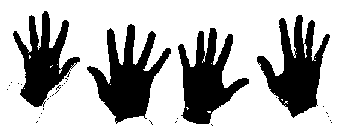

In [10]:
(R,G,B) =getImageChannels(handsImg)
getHands(R,G,B)

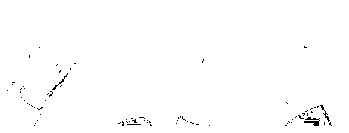

In [11]:
(R1,G1,B1) =getImageChannels(handsImg1)
getHands(R1,G1,B1)

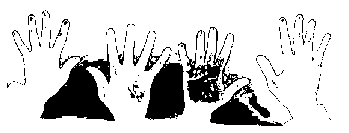

In [12]:
(R2,G2,B2) =getImageChannels(handsImg2)
getHands(R2,G2,B2)

In [13]:
def getChannelsInColorCoordinates(R:np.ndarray, G:np.ndarray, B:np.ndarray)->(np.ndarray,np.ndarray,np.ndarray):
    ch = R+G+B
    ch_R = R/ch
    ch_G = G/ch
    ch_B = B/ch
    return (ch_R,ch_G,ch_B)

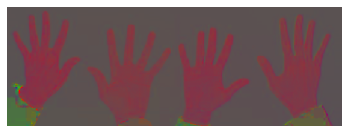

In [14]:
newR, newG, newB = getChannelsInColorCoordinates(R,G,B)
img = np.zeros(newR.size*3).reshape(newR.shape[0],newR.shape[1],3)
img[:,:,0]=newR
img[:,:,1]=newG 
img[:,:,2]=newB 
plt.imshow(img)
plt.axis('off');

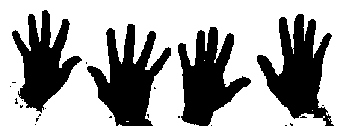

In [15]:
getHands(newR,newG,newB)

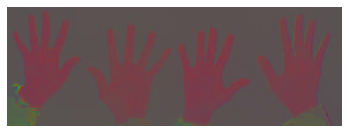

In [16]:
newR1, newG1, newB1 = getChannelsInColorCoordinates(R1,G1,B1)
img1 = np.zeros(newR1.size*3).reshape(newR1.shape[0],newR1.shape[1],3)
img1[:,:,0]=newR1 
img1[:,:,1]=newG1 
img1[:,:,2]=newB1
plt.imshow(img1)
plt.axis('off');

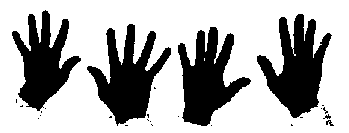

In [17]:
getHands(newR1,newG1,newB)

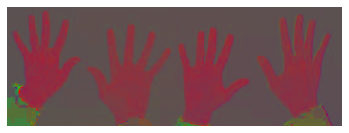

In [18]:
newR2, newG2, newB2 = getChannelsInColorCoordinates(R2,G2,B2)
img2 = np.zeros(newR2.size*3).reshape(newR2.shape[0],newR2.shape[1],3)
img2[:,:,0]=newR2
img2[:,:,1]=newG2 
img2[:,:,2]=newB2 
plt.imshow(img2)
plt.axis('off');

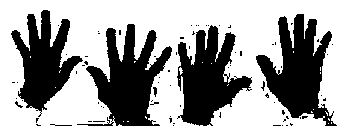

In [19]:
getHands(newR2,newG2,newB2)

### White Patch Algorithm

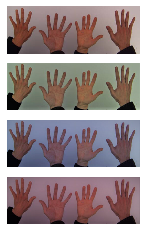

In [20]:
handsImg1 = plt.imread('../Images/Hands.png') #returns numpy array. RGBA
handsImg3 = plt.imread('../Images/Hands_3.png') #returns numpy array. RGBA
handsImg4 = plt.imread('../Images/Hands_4.png') #returns numpy array. RGBA
handsImg5 = plt.imread('../Images/Hands_5.png') #returns numpy array. RGBA

fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1)
ax1.imshow(handsImg1[:,:,0:3])
ax1.axis('off');
ax2.imshow(handsImg3[:,:,0:3]);
ax2.axis('off');
ax3.imshow(handsImg4[:,:,0:3]);
ax3.axis('off');
ax4.imshow(handsImg5[:,:,0:3]);
ax4.axis('off');

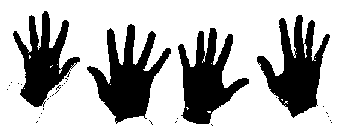

In [21]:
getHands(R,G,B)

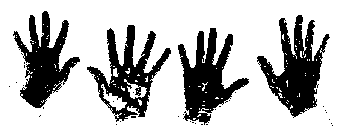

In [22]:
(R3,G3,B3) =getImageChannels(handsImg3)
getHands(R3,G3,B3)

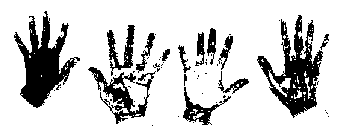

In [23]:
(R4,G4,B4) =getImageChannels(handsImg4)
getHands(R4,G4,B4)

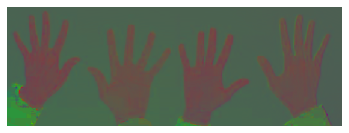

In [24]:
newR4, newG4, newB4 = getChannelsInColorCoordinates(R4,G4,B4)
img4 = np.zeros(newR4.size*3).reshape(newR4.shape[0],newR4.shape[1],3)
img4[:,:,0]=newR4 
img4[:,:,1]=newG4 
img4[:,:,2]=newB4
plt.axis('off')
plt.imshow(img4);

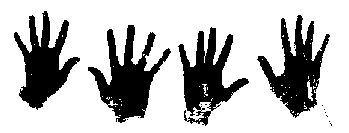

In [25]:
getHands(newR4,newG4,newB4)

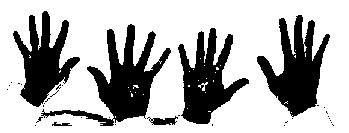

In [26]:
(R5,G5,B5) =getImageChannels(handsImg5)
getHands(R5,G5,B5)

In [27]:
def whitePatch(R,G,B):
    whiteLight = (1,1,1)
    maxR = R.max()
    maxG = G.max()
    maxB = B.max()
    newR = (whiteLight[0]/maxR)*R
    newG = (whiteLight[1]/maxG)*G
    newB = (whiteLight[2]/maxB)*B
    return (newR,newG,newB)

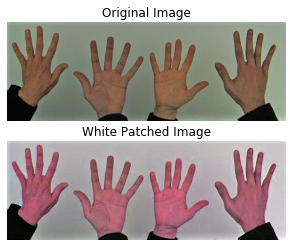

In [28]:
newR3, newG3, newB3 = whitePatch(R3,G3,B3)
img3 = np.zeros(newR3.size*3).reshape(newR3.shape[0],newR3.shape[1],3)
img3[:,:,0]=newR3
img3[:,:,1]=newG3 
img3[:,:,2]=newB3

fig,(ax1,ax2) = plt.subplots(2,1)
ax1.set_title('Original Image')
ax1.imshow(handsImg3[:,:,0:3]);
ax2.set_title('White Patched Image')
ax2.imshow(img3)
ax1.axis('off')
ax2.axis('off');

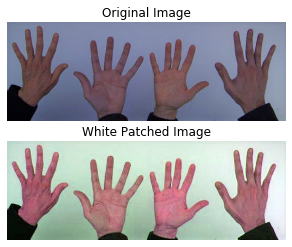

In [29]:
newR4, newG4, newB4 = whitePatch(R4,G4,B4)
img4 = np.zeros(newR4.size*3).reshape(newR4.shape[0],newR4.shape[1],3)
img4[:,:,0]=newR4
img4[:,:,1]=newG4 
img4[:,:,2]=newB4

fig,(ax1,ax2) = plt.subplots(2,1)
ax1.set_title('Original Image')
ax1.imshow(handsImg4[:,:,0:3]);
ax2.set_title('White Patched Image')
ax2.imshow(img4)
ax1.axis('off')
ax2.axis('off');

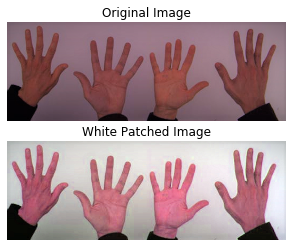

In [30]:
newR5, newG5, newB5 = whitePatch(R5,G5,B5)
img5 = np.zeros(newR5.size*3).reshape(newR5.shape[0],newR5.shape[1],3)
img5[:,:,0]=newR5
img5[:,:,1]=newG5 
img5[:,:,2]=newB5

fig,(ax1,ax2) = plt.subplots(2,1)
ax1.set_title('Original Image')
ax1.imshow(handsImg5[:,:,0:3]);
ax2.set_title('White Patched Image')
ax2.imshow(img5)
ax1.axis('off')
ax2.axis('off');

### Componente Conexa 

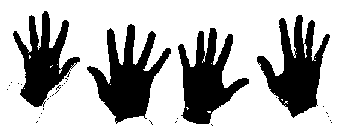

In [33]:
handsIMG =getHands(R,G,B)

In [35]:
handsIMG

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])